### Create Latitude and Longitude Combinations

### Module 6.1.4

In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In the next cell, we'll add the code that generates the latitudes and longitudes, but first, they need to be stored so that we can access them later. Since we are creating arrays of latitudes and longitudes, we'll declare each array as a variable.

In the next cell, add the following code that we used to generate the random latitudes. Also, we'll create a similar code snippet that will generate longitudes. To ensure enough latitudes and longitudes, we'll start with 1,500. In addition, we'll pack the latitudes (lats) and longitudes (lngs) as pairs by zipping them (lat_lngs) with the zip() function.

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple. If there are 1,500 latitudes and longitudes, there will be 1,500 tuples of paired latitudes and longitudes, where each latitude and longitude in a tuple can be accessed by the index of 0 and 1, respectively.

Next, let's unpack our lat_lngs zip object into a list. This way, we only need to create a set of random latitudes and longitudes once. In a new cell in the WeatherPy.ipynb file, add the following code and run the cell.

In [3]:
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

coordinates

[(37.276827395733605, -155.85597998177244),
 (31.918070853792997, 129.76249423994852),
 (33.6994149417049, -101.31377728629606),
 (82.20920067476143, -179.60161892777904),
 (-22.204251866438625, 150.00861546026152),
 (21.074469876775794, -139.66120497317786),
 (-17.337907136247324, -33.94370666752749),
 (-9.043410157708621, -127.981872199804),
 (-29.007343565691997, 63.35085072125659),
 (-83.75294723669214, 79.46993809736557),
 (87.7048524802124, 39.745022349244124),
 (38.49826500192091, 156.0308593784345),
 (13.424234025510088, -161.48616832557104),
 (-52.082608192201114, 86.78733084342701),
 (54.642326439142494, 136.38221855857222),
 (-58.25511454272697, -105.65210991908981),
 (-60.330045890246915, -93.60556582533434),
 (-17.691872869028842, 172.09691496334307),
 (-46.52929334357803, 168.79401153133512),
 (-54.43600452341781, -161.19677111745813),
 (-19.707555675457158, -26.098969664417666),
 (23.323504419729247, 168.80788507348205),
 (42.165466940868555, 120.59504839626078),
 (60.80

We are making great progress. With our list of random latitudes and longitudes, we'll use the coordinates in our lat_lngs tuple to find the nearest city using Python's citipy module.

Since we haven't worked with the citipy module yet, let's import and test it. Citipy doesn't come with the Anaconda module, so we'll install it in our PythonData environment.

In [6]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


### First, import the citipy module in our WeatherPy file

In [7]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

### Some of this code should look familiar, but let's break it down:

1. We create a cities list to store city names.
2. We iterate through the coordinates, as in our practice, and retrieve the nearest city using the latitude and longitude pair.
3. We add a decision statement with the logical operator not in to determine whether the found city is already in the cities list. If not, then we'll use the append() function to add it. 

We are doing this because among the 1,500 latitudes and longitudes, there might be duplicates, which will retrieve duplicate cities, and we want to be sure we capture only the unique cities.

## 6.2.6 Get the City Weather Data

In [11]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [12]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d170bf6ae0d5b7630c4a6b899acb279a


In [13]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | ushibuka
Processing Record 3 of Set 1 | lubbock
Processing Record 4 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 5 of Set 1 | yeppoon
Processing Record 6 of Set 1 | hilo
Processing Record 7 of Set 1 | belmonte
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | mahebourg
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 12 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 13 of Set 1 | makakilo city
Processing Record 14 of Set 1 | chumikan
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | isangel
Processing Record 17 of Set 1 | wyndham
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | caravelas
Processing Record 20 of Set 1 | butaritari
Processing Record 21 of Set 1 | beipia

Processing Record 35 of Set 4 | vavozh
Processing Record 36 of Set 4 | west wendover
Processing Record 37 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 38 of Set 4 | juegang
Processing Record 39 of Set 4 | inhambane
Processing Record 40 of Set 4 | lompoc
Processing Record 41 of Set 4 | teya
Processing Record 42 of Set 4 | havre
Processing Record 43 of Set 4 | saint-philippe
Processing Record 44 of Set 4 | ahipara
Processing Record 45 of Set 4 | tawnat
City not found. Skipping...
Processing Record 46 of Set 4 | cabo san lucas
Processing Record 47 of Set 4 | tonantins
Processing Record 48 of Set 4 | opuwo
Processing Record 49 of Set 4 | san diego de la union
Processing Record 50 of Set 4 | kuminskiy
Processing Record 1 of Set 5 | severo-yeniseyskiy
Processing Record 2 of Set 5 | selenduma
Processing Record 3 of Set 5 | bonavista
Processing Record 4 of Set 5 | sibolga
Processing Record 5 of Set 5 | kalianget
Processing Record 6 of Set 5 | homer
Processing Record 7 o

Processing Record 26 of Set 8 | olot
Processing Record 27 of Set 8 | alwar
Processing Record 28 of Set 8 | yar-sale
Processing Record 29 of Set 8 | mali
Processing Record 30 of Set 8 | san pedro de cajas
Processing Record 31 of Set 8 | susangerd
Processing Record 32 of Set 8 | lorengau
Processing Record 33 of Set 8 | kavaratti
Processing Record 34 of Set 8 | dinar
Processing Record 35 of Set 8 | saint-louis
Processing Record 36 of Set 8 | hihifo
City not found. Skipping...
Processing Record 37 of Set 8 | kenai
Processing Record 38 of Set 8 | fukue
Processing Record 39 of Set 8 | husavik
Processing Record 40 of Set 8 | ponta do sol
Processing Record 41 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 42 of Set 8 | souillac
Processing Record 43 of Set 8 | chapais
Processing Record 44 of Set 8 | tukrah
Processing Record 45 of Set 8 | ilulissat
Processing Record 46 of Set 8 | namibe
Processing Record 47 of Set 8 | nara
Processing Record 48 of Set 8 | tupelo
Processing 

Processing Record 18 of Set 12 | youghal
Processing Record 19 of Set 12 | khasan
Processing Record 20 of Set 12 | honiara
Processing Record 21 of Set 12 | rolim de moura
City not found. Skipping...
Processing Record 22 of Set 12 | kabwe
Processing Record 23 of Set 12 | seymchan
Processing Record 24 of Set 12 | arlit
Processing Record 25 of Set 12 | nguiu
City not found. Skipping...
Processing Record 26 of Set 12 | krasnoselkup
Processing Record 27 of Set 12 | saint-leu
Processing Record 28 of Set 12 | killybegs
Processing Record 29 of Set 12 | raga
Processing Record 30 of Set 12 | baloda bazar
Processing Record 31 of Set 12 | azimur
City not found. Skipping...
Processing Record 32 of Set 12 | samusu
City not found. Skipping...
Processing Record 33 of Set 12 | burica
City not found. Skipping...
Processing Record 34 of Set 12 | kagalnitskaya
Processing Record 35 of Set 12 | porto empedocle
Processing Record 36 of Set 12 | tambura
Processing Record 37 of Set 12 | antofagasta
Processing Re

## 6.2.7 Create a Dataframe of City Weather Data

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.08,-159.32,66.20,88,1,10.29,US,2020-12-23 17:50:20
1,Ushibuka,32.19,130.02,53.33,64,97,7.31,JP,2020-12-23 17:50:21
2,Lubbock,33.60,-101.83,48.00,20,20,19.46,US,2020-12-23 17:45:30
3,Yeppoon,-23.13,150.73,80.60,65,90,12.75,AU,2020-12-23 17:50:21
4,Hilo,19.73,-155.09,66.20,82,1,8.05,US,2020-12-23 17:50:22
5,Belmonte,-15.86,-38.88,84.20,58,20,20.80,BR,2020-12-23 17:50:22
6,Atuona,-9.80,-139.03,78.62,77,14,17.02,PF,2020-12-23 17:50:22
7,Mahebourg,-20.41,57.70,78.80,83,75,13.87,MU,2020-12-23 17:50:22
8,Busselton,-33.65,115.33,73.99,54,43,10.00,AU,2020-12-23 17:50:23
9,Makakilo City,21.35,-158.09,68.00,88,1,4.70,US,2020-12-23 17:50:23


In [16]:
# Reorder the columns in the order you want them to appear

new_column_order = ["City", "Country", "Date", "Lat",
                    "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

# Assign a new or the same DataFrame the new column order.
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2020-12-23 17:50:20,22.08,-159.32,66.20,88,1,10.29
1,Ushibuka,JP,2020-12-23 17:50:21,32.19,130.02,53.33,64,97,7.31
2,Lubbock,US,2020-12-23 17:45:30,33.60,-101.83,48.00,20,20,19.46
3,Yeppoon,AU,2020-12-23 17:50:21,-23.13,150.73,80.60,65,90,12.75
4,Hilo,US,2020-12-23 17:50:22,19.73,-155.09,66.20,82,1,8.05
5,Belmonte,BR,2020-12-23 17:50:22,-15.86,-38.88,84.20,58,20,20.80
6,Atuona,PF,2020-12-23 17:50:22,-9.80,-139.03,78.62,77,14,17.02
7,Mahebourg,MU,2020-12-23 17:50:22,-20.41,57.70,78.80,83,75,13.87
8,Busselton,AU,2020-12-23 17:50:23,-33.65,115.33,73.99,54,43,10.00
9,Makakilo City,US,2020-12-23 17:50:23,21.35,-158.09,68.00,88,1,4.70


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# 6.3.1 Plot Latitude Vs. Temperature

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [19]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1608746068.2785962

In [20]:
# Use string format method to reformat the datetime stamp.
today = time.strftime("%x")
today

'12/23/20'

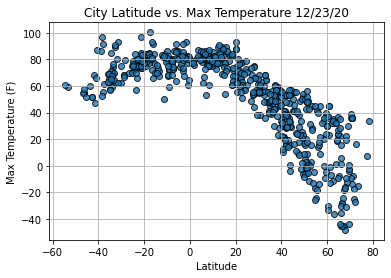

In [21]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()